In [ ]:
!pip install transformers pillow torch torchvision requests pandas scikit-learn

# Import Libraries & Load dataset

In [ ]:
import torch
import requests
import matplotlib.pyplot as plt
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration, pipeline
from transformers import AutoProcessor, Blip2ForConditionalGeneration

import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/COMP576/Project/data-1000.csv'

df = pd.read_csv(dataset_path)

In [ ]:
df_50 = df[:50]
df_50

,url
0,http://images.cocodataset.org/val2017/00000003...
1,http://images.cocodataset.org/val2017/00000025...
2,http://images.cocodataset.org/val2017/00000008...
3,http://images.cocodataset.org/val2017/00000017...
4,http://images.cocodataset.org/val2017/00000040...
5,http://images.cocodataset.org/val2017/00000000...
6,http://images.cocodataset.org/val2017/00000048...
7,http://images.cocodataset.org/val2017/00000033...
8,http://images.cocodataset.org/val2017/00000029...
9,http://images.cocodataset.org/val2017/00000050...


In [ ]:
df_950 = df[50:]
len(df_950)

950

In [ ]:
# processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
# model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [ ]:
print(device)

cuda


In [ ]:
df['url'][0]

'http://images.cocodataset.org/val2017/000000037777.jpg'

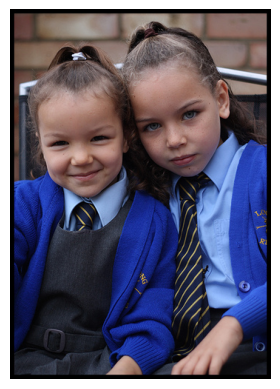


Generated Captions:
Positive:  two young girls in school uniforms posing for the camera

Negative:  "two little girls sitting on a bench"

Neutral:  two young girls posing for a picture



In [ ]:
# def load_image(image_url):
#     # Option 1: Load from URL
#     image = Image.open(requests.get(image_url, stream=True).raw)
#     return image

# # def generate_caption(image, prompt):
# #     inputs = processor(image, prompt, return_tensors="pt")
# #     outputs = model.generate(
# #         **inputs,
# #         max_new_tokens=50,
# #         do_sample=True,         # Enable sampling
# #         temperature=0.7,        # Add randomness
# #         top_k=50,               # Limit to top-k tokens
# #         top_p=0.9,              # Use nucleus sampling
# #         repetition_penalty=1.2  # Penalize repeated tokens
# #     )
# #     caption = processor.decode(outputs[0], skip_special_tokens=True)
# #     print(caption)
# #     if caption.startswith(prompt):
# #         caption = caption[len(prompt):].strip()
# #     return caption

# def generate_caption(image, prompt):
#     inputs = processor(image, prompt, return_tensors="pt").to(device)
#     outputs = model.generate(
#         **inputs,
#         max_new_tokens=50,
#         num_beams=5,            # Use beam search
#         repetition_penalty=1.2  # Penalize repeated tokens
#     )
#     caption = processor.decode(outputs[0], skip_special_tokens=True)
#     if caption.startswith(prompt):
#         caption = caption[len(prompt):].strip()
#     return caption



# # Main function
# def main():
#     # Load the image
#     image = load_image(df['url'][567])

#     # Display the image
#     plt.imshow(image)
#     plt.axis("off")
#     plt.show()

#     # Define prompts for different sentiments
#     positive_prompt = "Cheerful and happy description with positive emotions:"
#     negative_prompt = "Somber and critical and negative and bad and insane description:"
#     neutral_prompt = "Objective description:"

#     # Generate captions
#     positive_caption = generate_caption(image, positive_prompt)
#     negative_caption = generate_caption(image, negative_prompt)
#     neutral_caption = generate_caption(image, neutral_prompt)

#     # Print the results
#     print("\nGenerated Captions:")
#     print(f"Positive: {positive_caption}")
#     print(f"Negative: {negative_caption}")
#     print(f"Neutral: {neutral_caption}")

# # Run the main function
# main()

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# Load BLIP-2 and sentiment analysis modules
from transformers import AutoProcessor, Blip2ForConditionalGeneration

# Load model and processor
# processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
# model = Blip2ForConditionalGeneration.from_pretrained(
#     "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
# )


device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
sentiment_analyzer = pipeline('sentiment-analysis')

# Function to load image from a URL
def load_image(image_url):
    try:
        image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")
        return image
    except Exception as e:
        print(f"Error loading image from {image_url}: {e}")
        return None

# Function to generate captions using BLIP-2
def generate_caption(image, prompt):
    inputs = processor(image, prompt, return_tensors="pt").to(device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=50,
        num_beams=5,  # Beam search for deterministic results
        repetition_penalty=1.2  # Penalize repeated tokens
    )
    caption = processor.decode(outputs[0], skip_special_tokens=True).strip()
    if prompt in caption:
        caption = caption.replace(prompt, "").strip()
    return caption

def analyze_sentiment(text):
    sentiment = sentiment_analyzer(text)
    return sentiment[0]['label']

# Function to process captions and sentiments for the dataset
def process_captions_and_sentiments(df):
    # Prompts for captions
    positive_prompt = "Cheerful and happy description:"
    negative_prompt = "Somber and critical and negative description:"

    # Initialize result lists
    positive_captions = []
    negative_captions = []
    positive_sentiments = []
    negative_sentiments = []

    # Loop through URLs
    for idx, url in enumerate(df['url']):
        print(f"Processing {idx + 1}/{len(df)}: {url}")

        # Load the image
        image = load_image(url)
        if image:
            # Generate captions
            pos_caption = generate_caption(image, positive_prompt)
            neg_caption = generate_caption(image, negative_prompt)

            # Append captions
            positive_captions.append(pos_caption)
            negative_captions.append(neg_caption)

            # Analyze sentiments
            positive_sentiments.append(analyze_sentiment(pos_caption))
            negative_sentiments.append(analyze_sentiment(neg_caption))
        else:
            # Handle missing images
            positive_captions.append(None)
            negative_captions.append(None)
            positive_sentiments.append(None)
            negative_sentiments.append(None)

    # Add results to the DataFrame
    df['positive_caption'] = positive_captions
    df['negative_caption'] = negative_captions
    df['positive_sentiment'] = positive_sentiments
    df['negative_sentiment'] = negative_sentiments
    df['expected_positive_sentiment'] = 'POSITIVE'
    df['expected_negative_sentiment'] = 'NEGATIVE'

    # Save the updated DataFrame
    output_path = '/content/drive/MyDrive/COMP576/Project/results_with_captions_50.csv'
    df.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")

# first 50 data in df:

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
process_captions_and_sentiments(df_50)

Processing 1/50: http://images.cocodataset.org/val2017/000000037777.jpg
Processing 2/50: http://images.cocodataset.org/val2017/000000252219.jpg
Processing 3/50: http://images.cocodataset.org/val2017/000000087038.jpg
Processing 4/50: http://images.cocodataset.org/val2017/000000174482.jpg
Processing 5/50: http://images.cocodataset.org/val2017/000000403385.jpg
Processing 6/50: http://images.cocodataset.org/val2017/000000006818.jpg
Processing 7/50: http://images.cocodataset.org/val2017/000000480985.jpg
Processing 8/50: http://images.cocodataset.org/val2017/000000331352.jpg
Processing 9/50: http://images.cocodataset.org/val2017/000000296649.jpg
Processing 10/50: http://images.cocodataset.org/val2017/000000502136.jpg
Processing 11/50: http://images.cocodataset.org/val2017/000000491497.jpg
Processing 12/50: http://images.cocodataset.org/val2017/000000184791.jpg
Processing 13/50: http://images.cocodataset.org/val2017/000000289393.jpg
Processing 14/50: http://images.cocodataset.org/val2017/0000

<ipython-input-14-bb2a307c0feb>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive_caption'] = positive_captions
<ipython-input-14-bb2a307c0feb>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negative_caption'] = negative_captions
<ipython-input-14-bb2a307c0feb>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
# the remaining 950 datasets
process_captions_and_sentiments(df_950)

Processing 1/950: http://images.cocodataset.org/val2017/000000016228.jpg
Processing 2/950: http://images.cocodataset.org/val2017/000000382088.jpg
Processing 3/950: http://images.cocodataset.org/val2017/000000266409.jpg
Processing 4/950: http://images.cocodataset.org/val2017/000000430961.jpg
Processing 5/950: http://images.cocodataset.org/val2017/000000080671.jpg
Processing 6/950: http://images.cocodataset.org/val2017/000000577539.jpg
Processing 7/950: http://images.cocodataset.org/val2017/000000104612.jpg
Processing 8/950: http://images.cocodataset.org/val2017/000000476258.jpg
Processing 9/950: http://images.cocodataset.org/val2017/000000448365.jpg
Processing 10/950: http://images.cocodataset.org/val2017/000000035197.jpg
Processing 11/950: http://images.cocodataset.org/val2017/000000349860.jpg
Processing 12/950: http://images.cocodataset.org/val2017/000000180135.jpg
Processing 13/950: http://images.cocodataset.org/val2017/000000486438.jpg
Processing 14/950: http://images.cocodataset.or

<ipython-input-14-bb2a307c0feb>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive_caption'] = positive_captions
<ipython-input-14-bb2a307c0feb>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negative_caption'] = negative_captions
<ipython-input-14-bb2a307c0feb>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
# input df_50
dataset_path_df_50 = '/content/drive/MyDrive/COMP576/Project/results_with_captions_50.csv'

df_50 = pd.read_csv(dataset_path_df_50)
df_50.head()


,url,positive_caption,negative_caption,positive_sentiment,negative_sentiment,expected_positive_sentiment,expected_negative_sentiment
0,http://images.cocodataset.org/val2017/00000001...,horse drawn trolley,a horse pulling a trolley,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE
1,http://images.cocodataset.org/val2017/00000038...,a horse in a fenced-in area,a horse in a fenced-in area,POSITIVE,POSITIVE,POSITIVE,NEGATIVE
2,http://images.cocodataset.org/val2017/00000026...,man on skis in the snow,a man on skis in the snow,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE
3,http://images.cocodataset.org/val2017/00000043...,tampa bay rays pitcher david price,tampa bay rays starting pitcher david price th...,POSITIVE,POSITIVE,POSITIVE,NEGATIVE
4,http://images.cocodataset.org/val2017/00000008...,a young skier in the snow,a child on skis in the snow,POSITIVE,POSITIVE,POSITIVE,NEGATIVE


In [ ]:
# Evaluate sentiment classification
def evaluate_sentiment(df):
    # Positive sentiment evaluation
    pos_accuracy = accuracy_score(df['expected_positive_sentiment'], df['positive_sentiment'])
    print(f"Positive Sentiment Accuracy: {pos_accuracy:.2f}")

    # Negative sentiment evaluation
    neg_accuracy = accuracy_score(df['expected_negative_sentiment'], df['negative_sentiment'])
    print(f"Negative Sentiment Accuracy: {neg_accuracy:.2f}")

    # Classification report
    y_true = df['expected_positive_sentiment'].tolist() + df['expected_negative_sentiment'].tolist()
    y_pred = df['positive_sentiment'].tolist() + df['negative_sentiment'].tolist()
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))

In [ ]:
# Remove rows with NaN values in any column
df_50 = df_50.dropna()

# Reset the index of the cleaned DataFrame
df_50.reset_index(drop=True, inplace=True)

print(f"Cleaned DataFrame shape: {df_50.shape}")

Cleaned DataFrame shape: (931, 7)


In [ ]:
len(df_50)
evaluate_sentiment(df_50)

Positive Sentiment Accuracy: 0.48
Negative Sentiment Accuracy: 0.57

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.52      0.57      0.54       931
    POSITIVE       0.53      0.48      0.50       931

    accuracy                           0.52      1862
   macro avg       0.52      0.52      0.52      1862
weighted avg       0.52      0.52      0.52      1862



# Evaluate

In [ ]:
from sklearn.metrics import classification_report, accuracy_score


# Text similarity evaluation (Optional: Using cosine similarity or Jaccard similarity)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def text_similarity(df):
    vectorizer = TfidfVectorizer()
    similarities = []

    for _, row in df.iterrows():
        positive_vector = vectorizer.fit_transform([row['positive_caption']])
        negative_vector = vectorizer.transform([row['negative_caption']])
        sim = cosine_similarity(positive_vector, negative_vector)[0, 0]
        similarities.append(sim)

    df['caption_similarity'] = similarities
    avg_similarity = df['caption_similarity'].mean()
    print(f"\nAverage Caption Similarity (Positive vs Negative): {avg_similarity:.2f}")

# Run evaluations
evaluate_sentiment(df_50)
text_similarity(df_50)

# Inspect mismatches
mismatched = df_50[
    (df_50['positive_sentiment'] != df_50['expected_positive_sentiment']) |
    (df_50['negative_sentiment'] != df_50['expected_negative_sentiment'])
]
print("\nMismatched Rows:\n")
print(mismatched)

Positive Sentiment Accuracy: 0.48
Negative Sentiment Accuracy: 0.57

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.52      0.57      0.54       931
    POSITIVE       0.53      0.48      0.50       931

    accuracy                           0.52      1862
   macro avg       0.52      0.52      0.52      1862
weighted avg       0.52      0.52      0.52      1862


Average Caption Similarity (Positive vs Negative): 0.84

Mismatched Rows:

                                                   url  \
0    http://images.cocodataset.org/val2017/00000001...   
1    http://images.cocodataset.org/val2017/00000038...   
2    http://images.cocodataset.org/val2017/00000026...   
3    http://images.cocodataset.org/val2017/00000043...   
4    http://images.cocodataset.org/val2017/00000008...   
..                                                 ...   
925  http://images.cocodataset.org/val2017/00000005...   
926  http://images.cocodataset.org/val20

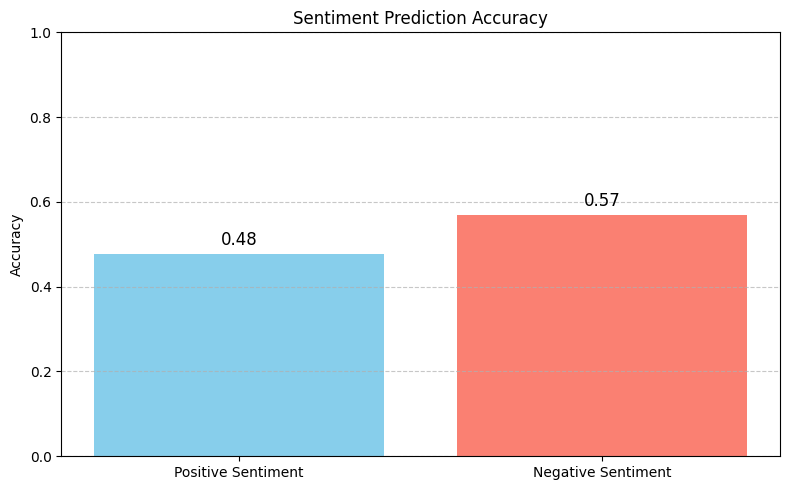

In [ ]:
import matplotlib.pyplot as plt

def plot_sentiment_accuracy(df):
    pos_accuracy = accuracy_score(df['expected_positive_sentiment'], df['positive_sentiment'])
    neg_accuracy = accuracy_score(df['expected_negative_sentiment'], df['negative_sentiment'])

    # Data for plotting
    categories = ['Positive Sentiment', 'Negative Sentiment']
    accuracies = [pos_accuracy, neg_accuracy]

    # Create a bar plot
    plt.figure(figsize=(8, 5))
    plt.bar(categories, accuracies, color=['skyblue', 'salmon'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Sentiment Prediction Accuracy')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add accuracy labels on bars
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

    plt.tight_layout()
    plt.show()

# Plot sentiment accuracy
plot_sentiment_accuracy(df_50)


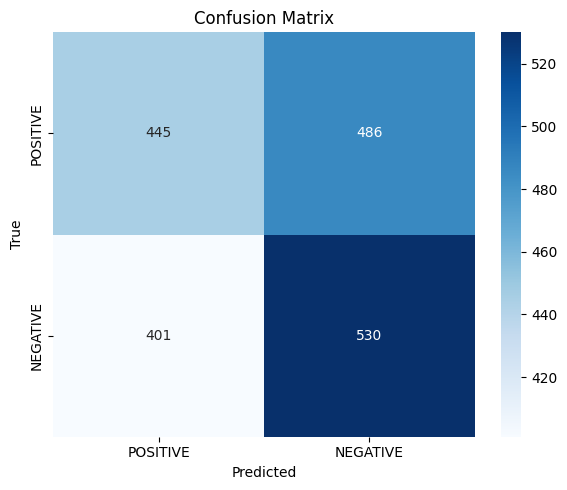

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(df):
    y_true = df['expected_positive_sentiment'].tolist() + df['expected_negative_sentiment'].tolist()
    y_pred = df['positive_sentiment'].tolist() + df['negative_sentiment'].tolist()
    cm = confusion_matrix(y_true, y_pred, labels=['POSITIVE', 'NEGATIVE'])

    # Create a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(df_50)

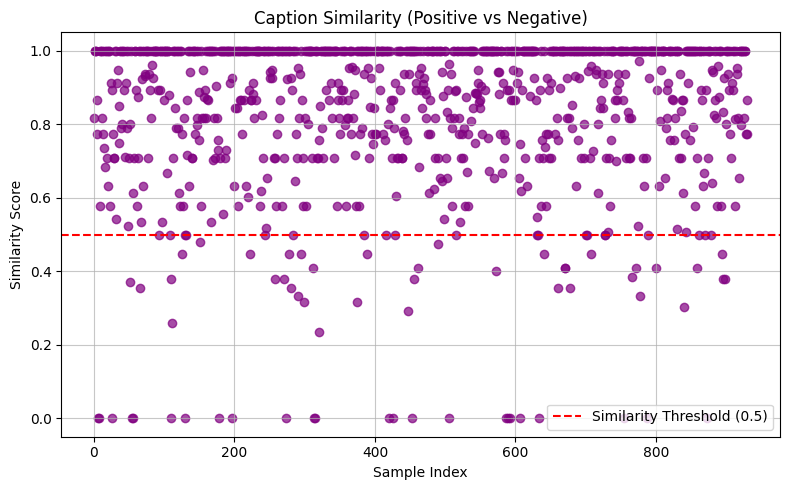

In [ ]:
def plot_caption_similarity(df):
    vectorizer = TfidfVectorizer()
    similarities = []

    for _, row in df.iterrows():
        positive_vector = vectorizer.fit_transform([row['positive_caption']])
        negative_vector = vectorizer.transform([row['negative_caption']])
        sim = cosine_similarity(positive_vector, negative_vector)[0, 0]
        similarities.append(sim)

    df['caption_similarity'] = similarities

    # Scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(df)), df['caption_similarity'], color='purple', alpha=0.7)
    plt.axhline(y=0.5, color='r', linestyle='--', label='Similarity Threshold (0.5)')
    plt.xlabel('Sample Index')
    plt.ylabel('Similarity Score')
    plt.title('Caption Similarity (Positive vs Negative)')
    plt.legend()
    plt.grid(alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot caption similarity
plot_caption_similarity(df_50)


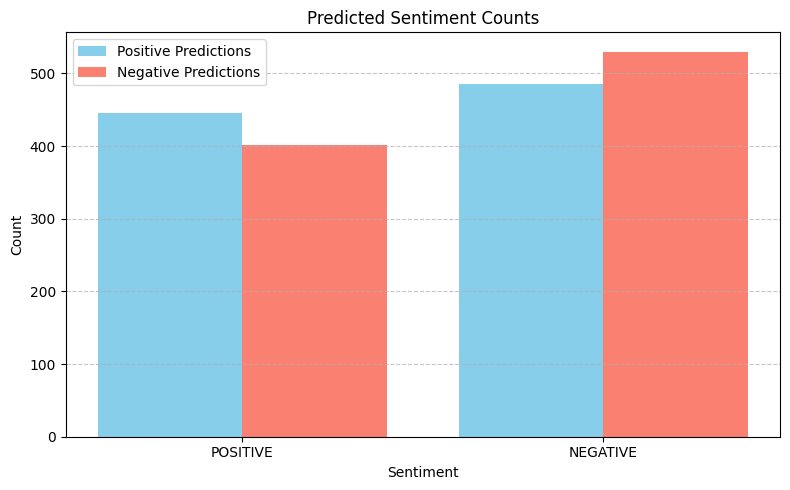

In [ ]:
def plot_sentiment_counts(df):
    pos_count = df['positive_sentiment'].value_counts()
    neg_count = df['negative_sentiment'].value_counts()

    # Data for plotting
    categories = ['POSITIVE', 'NEGATIVE']
    pos_values = [pos_count.get('POSITIVE', 0), pos_count.get('NEGATIVE', 0)]
    neg_values = [neg_count.get('POSITIVE', 0), neg_count.get('NEGATIVE', 0)]

    x = range(len(categories))  # X positions

    # Plot bars
    plt.figure(figsize=(8, 5))
    plt.bar(x, pos_values, width=0.4, label='Positive Predictions', color='skyblue', align='center')
    plt.bar([p + 0.4 for p in x], neg_values, width=0.4, label='Negative Predictions', color='salmon', align='center')

    # Customize plot
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Predicted Sentiment Counts')
    plt.xticks([p + 0.2 for p in x], categories)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sentiment counts
plot_sentiment_counts(df_50)


In [ ]:
df_50.tail()

,url,positive_caption,negative_caption,positive_sentiment,negative_sentiment,expected_positive_sentiment,expected_negative_sentiment,caption_similarity
926,http://images.cocodataset.org/val2017/00000029...,a motorcycle parked on the grass,a motorcycle parked on the grass,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,1.000000
927,http://images.cocodataset.org/val2017/00000027...,motorcycles parked on the side of the road,"""motorcycles parked on the side of the road""",POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,1.000000
928,http://images.cocodataset.org/val2017/00000051...,"""a red biplane flying over a motorcycle""",a man riding a motorcycle next to a red biplane,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,0.774597
929,http://images.cocodataset.org/val2017/00000019...,the inside of a bus,the interior of a bus,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,0.866025
930,http://images.cocodataset.org/val2017/00000007...,cats in the living room,a cat and a chair in a living room,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,0.774597


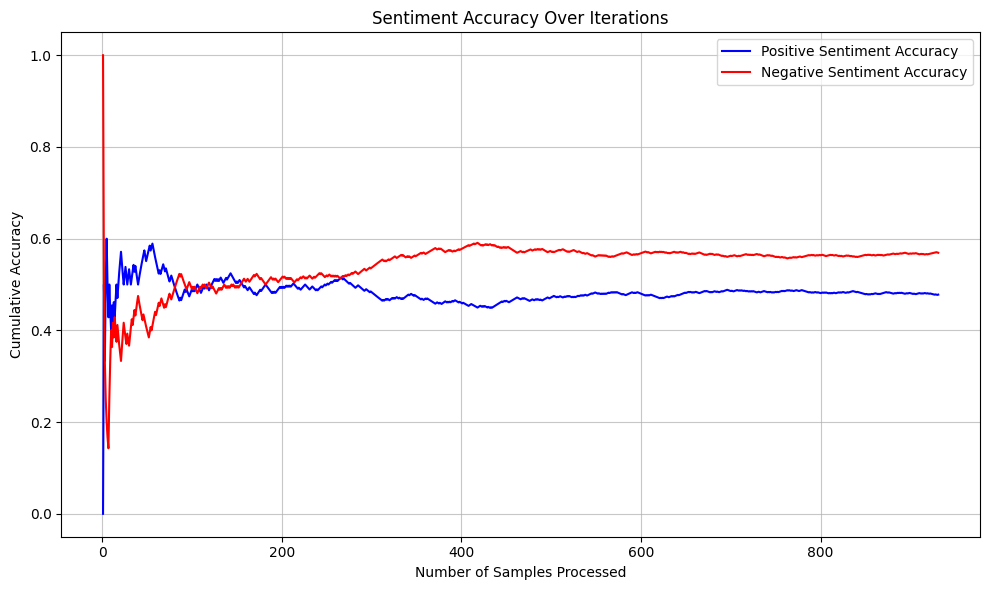

In [ ]:
def plot_accuracy_over_iterations(df):
    cumulative_pos_accuracy = []
    cumulative_neg_accuracy = []

    for i in range(1, len(df) + 1):
        sub_df = df.iloc[:i]
        cumulative_pos_accuracy.append(accuracy_score(sub_df['expected_positive_sentiment'], sub_df['positive_sentiment']))
        cumulative_neg_accuracy.append(accuracy_score(sub_df['expected_negative_sentiment'], sub_df['negative_sentiment']))

    # Line plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(df) + 1), cumulative_pos_accuracy, label='Positive Sentiment Accuracy', color='blue')
    plt.plot(range(1, len(df) + 1), cumulative_neg_accuracy, label='Negative Sentiment Accuracy', color='red')

    # Customize plot
    plt.xlabel('Number of Samples Processed')
    plt.ylabel('Cumulative Accuracy')
    plt.title('Sentiment Accuracy Over Iterations')
    plt.legend()
    plt.grid(alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot accuracy over iterations
plot_accuracy_over_iterations(df_50)


In [ ]:
sentiment_analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
def download_image(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        return Image.open(response.raw).convert('RGB')
    else:
        print(f"Failed to download image from {url}")
        return None

def generate_caption(image, prompt):
    inputs = processor(image, prompt, return_tensors="pt")
    output = model.generate(**inputs)
    return processor.decode(output[0], skip_special_tokens=True)

def analyze_sentiment(text):
    sentiment = sentiment_analyzer(text)
    return sentiment[0]['label']

In [ ]:
positive_prompt = "Generate a positive caption for this image."
negative_prompt = "Generate a negative caption for this image."

positive_captions = []
negative_captions = []
positive_sentiments = []
negative_sentiments = []

In [ ]:
# print(df['url'][0])
image = download_image(df['url'][0])
pos_caption = generate_caption(image, positive_prompt)
neg_caption = generate_caption(image, negative_prompt)
print(pos_caption)
print(neg_caption)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


generate a positive caption for this image. apartments
generate a negative caption for this image. apartments


In [ ]:
# Import Required Libraries
import torch
from PIL import Image
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load BLIP-2 Model and Processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to Download and Open Image
def download_image(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        return Image.open(response.raw).convert('RGB')
    else:
        print(f"Failed to download image from {url}")
        return None

# Function to Generate Caption
def generate_caption(image, prompt=None):
    if prompt:
        inputs = processor(image, prompt, return_tensors="pt")
    else:
        inputs = processor(image, return_tensors="pt")
    output = model.generate(**inputs)
    return processor.decode(output[0], skip_special_tokens=True)

# Example Usage
# Provide an image URL or a local image path
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"
image = download_image(image_url)

if image:
    # Generate default caption
    default_caption = generate_caption(image)
    print("Default Caption:", default_caption)

    # Generate caption with a prompt
    positive_prompt = "Task: describe image in a postive tone"
    positive_caption = generate_caption(image, positive_prompt)
    print("Positive Caption:", positive_caption)


Default Caption: two dice with one red and one green
Positive Caption: task : describe image in a postive tone


In [ ]:
# Function to Download and Open Image
def download_image(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        return Image.open(response.raw).convert('RGB')
    else:
        print(f"Failed to download image from {url}")
        return None

# Function to Generate Caption
def generate_caption(image, prompt=None):
    if prompt:
        inputs = processor(image, prompt, return_tensors="pt")
    else:
        inputs = processor(image, return_tensors="pt")
    output = model.generate(**inputs, max_new_tokens=10)
    return processor.decode(output[0], skip_special_tokens=True)

# Example Usage
# Provide an image URL or a local image path
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"
image = download_image(image_url)

if image:
    # Generate default caption
    default_caption = generate_caption(image)
    print("Default Caption:", default_caption)

    # Generate caption with a prompt
    positive_prompt = "Question: how to describe this image in a postive caption? Answer: "
    positive_caption = generate_caption(image, positive_prompt)
    print("Positive Caption:", positive_caption)


Default Caption: two dice with one red and one green
Positive Caption: question : how to describe this image in a postive caption? answer :


In [ ]:
positive_prompt = "Generate a positive caption for this image."
negative_prompt = "Generate a negative caption for this image."

positive_captions = []
negative_captions = []
positive_sentiments = []
negative_sentiments = []

for url in df['url']:
    image = download_image(url)
    if image:
        pos_caption = generate_caption(image, positive_prompt)
        neg_caption = generate_caption(image, negative_prompt)
        positive_captions.append(pos_caption)
        negative_captions.append(neg_caption)

        positive_sentiments.append(analyze_sentiment(pos_caption))
        negative_sentiments.append(analyze_sentiment(neg_caption))
    else:
        positive_captions.append(None)
        negative_captions.append(None)
        positive_sentiments.append(None)
        negative_sentiments.append(None)

df['positive_caption'] = positive_captions
df['negative_caption'] = negative_captions
df['positive_sentiment'] = positive_sentiments
df['negative_sentiment'] = negative_sentiments
df['expected_positive_sentiment'] = 'POSITIVE'
df['expected_negative_sentiment'] = 'NEGATIVE'

output_path = '/content/drive/MyDrive/COMP576/Project/results_with_captions.csv'
df.to_csv(output_path, index=False)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


KeyboardInterrupt: 

# Test2

In [ ]:
pip install "salesforce-lavis==1.0.2"

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB

In [ ]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

ModuleNotFoundError: No module named 'lavis'

# Evaluation

In [ ]:
# positive_captions = []
# negative_captions = []
# positive_sentiments = []
# negative_sentiments = []
print(len(positive_captions))
print(len(negative_captions))
print(len(positive_sentiments))
print(len(negative_sentiments))

525
525
525
525


In [ ]:
print(positive_captions[5])

generate a positive caption for this image.


In [ ]:
new_df = df[:525]
new_df

,url
0,http://images.cocodataset.org/val2017/00000003...
1,http://images.cocodataset.org/val2017/00000025...
2,http://images.cocodataset.org/val2017/00000008...
3,http://images.cocodataset.org/val2017/00000017...
4,http://images.cocodataset.org/val2017/00000040...
...,...
520,http://images.cocodataset.org/val2017/00000000...
521,http://images.cocodataset.org/val2017/00000006...
522,http://images.cocodataset.org/val2017/00000029...
523,http://images.cocodataset.org/val2017/00000024...


In [ ]:
new_df['positive_caption'] = positive_captions
new_df['negative_caption'] = negative_captions
new_df['positive_sentiment'] = positive_sentiments
new_df['negative_sentiment'] = negative_sentiments
new_df['expected_positive_sentiment'] = 'POSITIVE'
new_df['expected_negative_sentiment'] = 'NEGATIVE'

<ipython-input-18-42676b91407e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['positive_caption'] = positive_captions
<ipython-input-18-42676b91407e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['negative_caption'] = negative_captions
<ipython-input-18-42676b91407e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
output_path = '/content/drive/MyDrive/COMP576/Project/results_with_captions.csv'
new_df.to_csv(output_path, index=False)

In [ ]:
new_df.head()

,url,positive_caption,negative_caption,positive_sentiment,negative_sentiment,expected_positive_sentiment,expected_negative_sentiment
0,http://images.cocodataset.org/val2017/00000003...,generate a positive caption for this image. ap...,generate a negative caption for this image. ap...,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE
1,http://images.cocodataset.org/val2017/00000025...,generate a positive caption for this image.,generate a negative caption for this image.,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE
2,http://images.cocodataset.org/val2017/00000008...,generate a positive caption for this image.,generate a negative caption for this image.,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE
3,http://images.cocodataset.org/val2017/00000017...,generate a positive caption for this image.,generate a negative caption for this image.,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE
4,http://images.cocodataset.org/val2017/00000040...,generate a positive caption for this image.,generate a negative caption for this image.,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE
